In [2]:
pip install --upgrade mne

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 25.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import mne
import numpy as np

# GDF 파일 경로 지정
filename = "/home/work/HCOH/BCICIV_2a_gdf/A02T.gdf"

# GDF 파일 읽기
raw = mne.io.read_raw_gdf(filename)

# 이벤트 시간 위치 찾기
events, _ = mne.events_from_annotations(raw)

# 데이터 미리 로드
raw.load_data()

# 중복된 채널 이름 수정
def fix_duplicate_channel_names(raw):
    counts = {}
    new_names = []
    for name in raw.info['ch_names']:
        if name in counts:
            counts[name] += 1
            new_name = f"{name}-{counts[name]}"
        else:
            counts[name] = 1
            new_name = name
        new_names.append(new_name)
    rename_dict = dict(zip(raw.info['ch_names'], new_names))
    mne.rename_channels(raw.info, rename_dict)

fix_duplicate_channel_names(raw)

# EOG 채널 제거하고 원하는 EEG 채널만 선택
raw.info['bads'] += ['EOG-left', 'EOG-central', 'EOG-right']
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False, exclude='bads')

# 7-35 Hz 대역 통과 필터 적용
raw.filter(7., 35., picks=picks, fir_design='firwin')

# 4개의 클래스에 대한 288개의 이벤트에서 3초 시간 간격의 에포크 추출
tmin, tmax = 1., 4.
event_id = dict({'769': 7, '770': 8, '771': 9, '772': 10})

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                    baseline=None, preload=True)

print(epochs)
import mne
import numpy as np

# GDF 파일 경로 지정
filename = "/home/work/HCOH/BCICIV_2a_gdf/A01T.gdf"

# GDF 파일 읽기
raw = mne.io.read_raw_gdf(filename)

# 이벤트 시간 위치 찾기
events, _ = mne.events_from_annotations(raw)

# 데이터 미리 로드
raw.load_data()

# 중복된 채널 이름 수정
def fix_duplicate_channel_names(raw):
    counts = {}
    new_names = []
    for name in raw.info['ch_names']:
        if name in counts:
            counts[name] += 1
            new_name = f"{name}-{counts[name]}"
        else:
            counts[name] = 1
            new_name = name
        new_names.append(new_name)
    rename_dict = dict(zip(raw.info['ch_names'], new_names))
    mne.rename_channels(raw.info, rename_dict)

fix_duplicate_channel_names(raw)

# EOG 채널 제거하고 원하는 EEG 채널만 선택
raw.info['bads'] += ['EOG-left', 'EOG-central', 'EOG-right']
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False, exclude='bads')

# 7-35 Hz 대역 통과 필터 적용
raw.filter(7., 35., picks=picks, fir_design='firwin')

# 4개의 클래스에 대한 288개의 이벤트에서 3초 시간 간격의 에포크 추출
tmin, tmax = 1., 4.
event_id = dict({'769': 7, '770': 8, '771': 9, '772': 10})

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                    baseline=None, preload=True)
print(epochs)

Extracting EDF parameters from /home/work/HCOH/BCICIV_2a_gdf/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 751 original time points ...
0 bad epochs dropped
<Epochs |  288 events (all good), 1 – 4 s, baseline off, ~36.3 MB, data loaded,
 '769': 72
 '770': 72
 '771': 72
 '772': 72>


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 751 original time points ...
0 bad epochs dropped
<Epochs |  288 events (all good), 1 – 4 s, baseline off, ~36.3 MB, data loaded,
 '769': 72
 '770': 72
 '771': 72
 '772': 72>


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Using matplotlib as 2D backend.


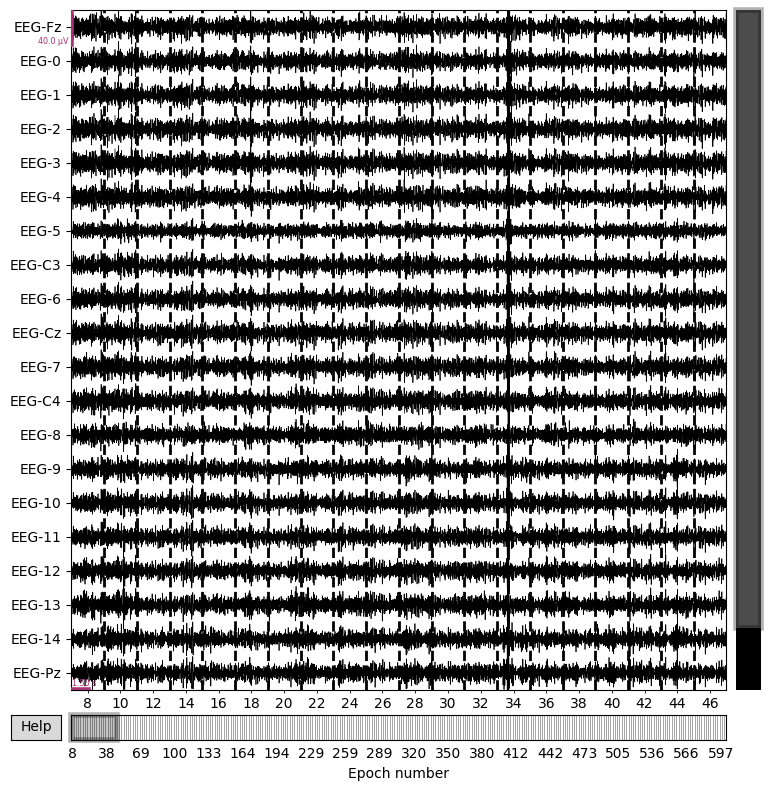

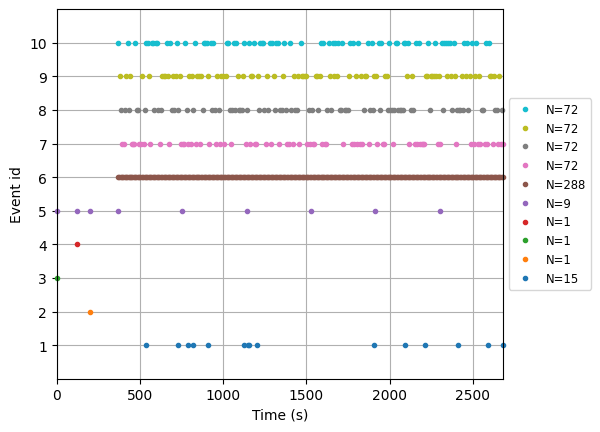

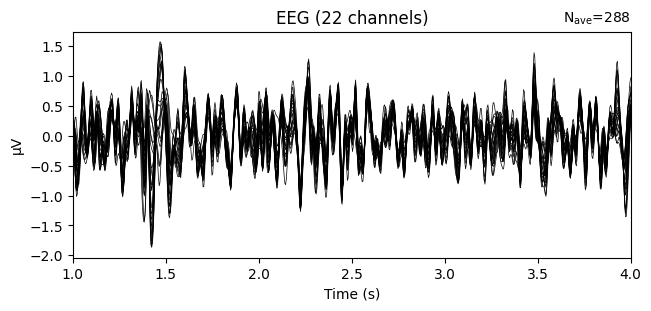

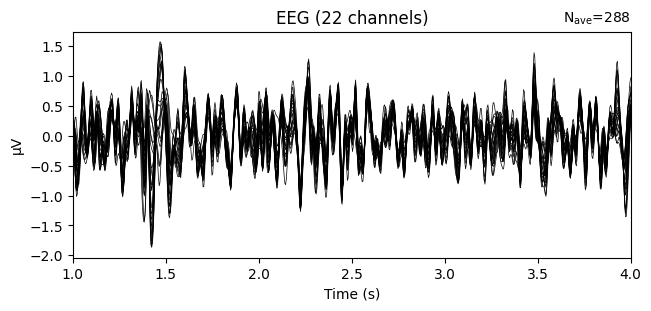

In [7]:
import matplotlib.pyplot as plt

# 에포크 데이터 시각화
epochs.plot()

# 이벤트 수 시각화
mne.viz.plot_events(events, sfreq=raw.info['sfreq'], first_samp=raw.first_samp)

# 에포크 평균을 이용한 전위 시각화
epochs.average().plot()


<Evoked | '769' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


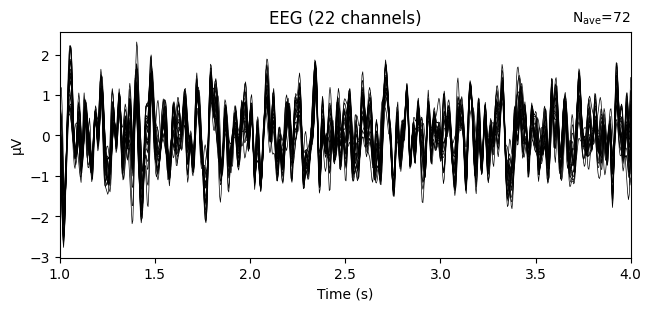

<Evoked | '770' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


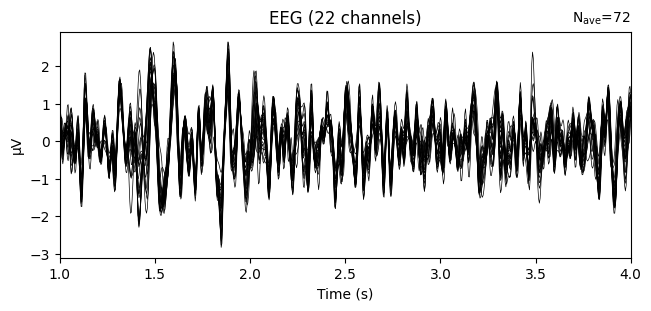

<Evoked | '771' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


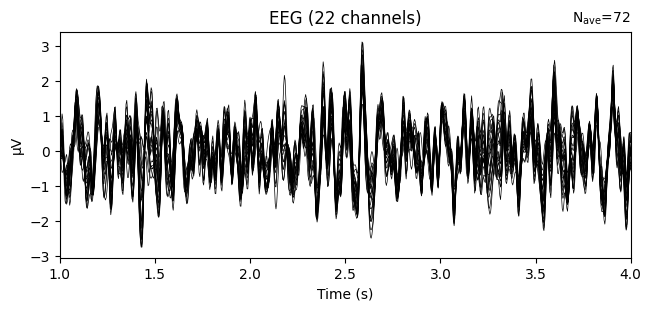

<Evoked | '772' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


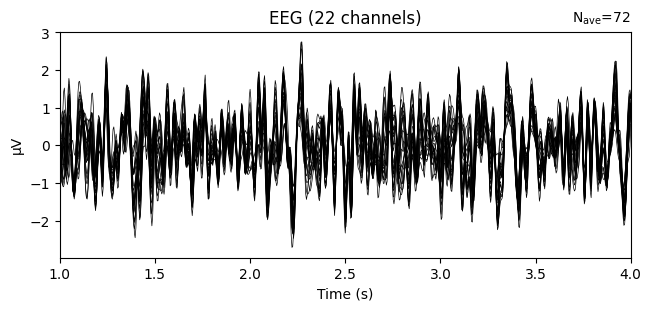

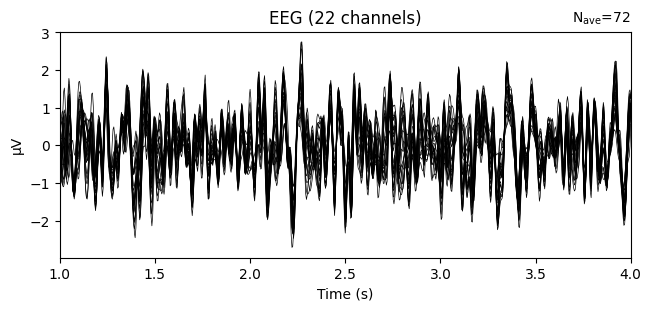

In [8]:
# left_hand = 769,right_hand = 770,foot = 771,tongue = 772

# Left hand epoch average plot

evoked = epochs['769'].average()
print(evoked)
evoked.plot(time_unit='s')

# Right hand epoch average plot

evoked = epochs['770'].average()
print(evoked)
evoked.plot(time_unit='s')

# Foot epoch average plot

evoked = epochs['771'].average()
print(evoked)
evoked.plot(time_unit='s')

# Tongue epoch average plot

evoked = epochs['772'].average()
print(evoked)
evoked.plot(time_unit='s')

In [9]:
# Getting labels and changing labels from 7,8,9,10 -> 1,2,3,4
labels = epochs.events[:,-1] - 7 + 1 

data = epochs.get_data()

/tmp/ipykernel_236/378257184.py:4: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()


In [10]:
import pywt

# signal is decomposed to level 5 with 'db4' wavelet

def wpd(X): 
    coeffs = pywt.WaveletPacket(X,'db4',mode='symmetric',maxlevel=5)
    return coeffs
             
def feature_bands(x):
    
    Bands = np.empty((8,x.shape[0],x.shape[1],30)) # 8 freq band coefficients are chosen from the range 4-32Hz
    
    for i in range(x.shape[0]):
        for ii in range(x.shape[1]):
             pos = []
             C = wpd(x[i,ii,:]) 
             pos = np.append(pos,[node.path for node in C.get_level(5, 'natural')])
             for b in range(1,9):
                 Bands[b-1,i,ii,:] = C[pos[b]].data
        
    return Bands

wpd_data = feature_bands(data)

In [11]:
from mne.decoding import CSP # Common Spatial Pattern Filtering
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from sklearn.model_selection import ShuffleSplit

# OneHotEncoding Labels
enc = OneHotEncoder()
X_out = enc.fit_transform(labels.reshape(-1,1)).toarray()

# Cross Validation Split
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc = []
ka = []
prec = []
recall = []


2024-08-14 02:09:08.452539: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-14 02:09:08.452612: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-14 02:09:08.452641: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-14 02:09:08.460166: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
def build_classifier(num_layers = 1):
    classifier = Sequential()
    #First Layer
    classifier.add(Dense(units = 124, kernel_initializer = 'uniform', activation = 'relu', input_dim = 32, 
                         kernel_regularizer=regularizers.l2(0.01))) # L2 regularization
    classifier.add(Dropout(0.5))
    # Intermediate Layers
    for itr in range(num_layers):
        classifier.add(Dense(units = 124, kernel_initializer = 'uniform', activation = 'relu', 
                             kernel_regularizer=regularizers.l2(0.01))) # L2 regularization
        classifier.add(Dropout(0.5))   
    # Last Layer
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'softmax'))
    classifier.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return classifier

In [13]:
import numpy as np
import pandas as pd
from mne.decoding import CSP  # Common Spatial Pattern Filtering
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# OneHotEncoding Labels
enc = OneHotEncoder()
X_out = enc.fit_transform(labels.reshape(-1, 1)).toarray()

# Cross Validation Split
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

# 초기화
acc = []
ka = []
prec = []
recall_scores = []
f1_scores = []
conf_matrices = []

# build_classifier 함수 정의
def build_classifier(input_dim):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.5))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=4, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 교차 검증 루프
for train_idx, test_idx in cv.split(labels, labels):
    Csp = []  # 빈 리스트
    ss = []   # 빈 리스트
    nn = []   # 빈 리스트

    label_train, label_test = labels[train_idx], labels[test_idx]
    y_train, y_test = X_out[train_idx], X_out[test_idx]

    # 모든 주파수 대역 계수에 대해 별도로 CSP 필터 적용
    Csp = [CSP(n_components=4, reg=None, log=True, norm_trace=False) for _ in range(8)]
    ss = preprocessing.StandardScaler()

    X_train = ss.fit_transform(np.concatenate(tuple(Csp[x].fit_transform(wpd_data[x, train_idx, :, :], label_train) for x in range(8)), axis=-1))
    X_test = ss.transform(np.concatenate(tuple(Csp[x].transform(wpd_data[x, test_idx, :, :]) for x in range(8)), axis=-1))

    nn = build_classifier(X_train.shape[1])

    nn.fit(X_train, y_train, batch_size=32, epochs=300, verbose=0)

    y_pred = nn.predict(X_test)
    pred = (y_pred == y_pred.max(axis=1)[:, None]).astype(int)

    acc.append(accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1)))
    ka.append(cohen_kappa_score(y_test.argmax(axis=1), pred.argmax(axis=1)))
    prec.append(precision_score(y_test.argmax(axis=1), pred.argmax(axis=1), average='weighted'))
    recall_scores.append(recall_score(y_test.argmax(axis=1), pred.argmax(axis=1), average='weighted'))
    f1_scores.append(f1_score(y_test.argmax(axis=1), pred.argmax(axis=1), average='weighted'))
    
    conf_matrix = confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))
    conf_matrices.append(conf_matrix)

# 결과 출력
scores = {'Accuracy': acc, 'Kappa': ka, 'Precision': prec, 'Recall': recall_scores, 'F1_Score': f1_scores}
Es = pd.DataFrame(scores)

# Calculate averages
avg = {'Accuracy': [np.mean(acc)], 'Kappa': [np.mean(ka)], 'Precision': [np.mean(prec)], 'Recall': [np.mean(recall_scores)], 'F1_Score': [np.mean(f1_scores)]}
Avg = pd.DataFrame(avg)

# Combine individual scores with averages
T = pd.concat([Es, Avg])

# Rename the index
T.index = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'Avg']
T.index.rename('Fold', inplace=True)

print(T)



Computing rank from data with rank=None
    Using tolerance 2.3e-05 (2.2e-16 eps * 22 dim * 4.6e+09  max singular value)
    Estimated rank (data): 22
    data: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating class=1 covariance using EMPIRICAL
Done.
Estimating class=2 covariance using EMPIRICAL
Done.
Estimating class=3 covariance using EMPIRICAL
Done.
Estimating class=4 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.1e-05 (2.2e-16 eps * 22 dim * 4.3e+09  max singular value)
    Estimated rank (data): 22
    data: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating class=1 covariance using EMPIRICAL
Done.
Estimating class=2 covariance using EMPIRICAL
Done.
Estimating class=3 covariance using EMPIRICAL
Done.
Estimating class=4 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.9e-05 (2.2e-16 eps *

2024-08-14 02:09:18.276532: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38698 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:08:00.0, compute capability: 8.0
2024-08-14 02:09:18.278837: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38698 MB memory:  -> device: 1, name: CUDA GPU, pci bus id: 0000:cc:00.0, compute capability: 8.0
2024-08-14 02:09:20.387275: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe2f4ccd910 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-14 02:09:20.387314: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): CUDA GPU, Compute Capability 8.0
2024-08-14 02:09:20.387320: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): CUDA GPU, Compute Capability 8.0
2024-08-14 02:09:20.395798: I t

2/2 [==============================] - 0s 3ms/step
Computing rank from data with rank=None
    Using tolerance 2.3e-05 (2.2e-16 eps * 22 dim * 4.7e+09  max singular value)
    Estimated rank (data): 22
    data: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating class=1 covariance using EMPIRICAL
Done.
Estimating class=2 covariance using EMPIRICAL
Done.
Estimating class=3 covariance using EMPIRICAL
Done.
Estimating class=4 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2e-05 (2.2e-16 eps * 22 dim * 4.2e+09  max singular value)
    Estimated rank (data): 22
    data: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating class=1 covariance using EMPIRICAL
Done.
Estimating class=2 covariance using EMPIRICAL
Done.
Estimating class=3 covariance using EMPIRICAL
Done.
Estimating class=4 covariance using EMPIRICAL
Done.
Computing rank from data with ran

Estimating class=1 covariance using EMPIRICAL
Done.
Estimating class=2 covariance using EMPIRICAL
Done.
Estimating class=3 covariance using EMPIRICAL
Done.
Estimating class=4 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.9e-05 (2.2e-16 eps * 22 dim * 6e+09  max singular value)
    Estimated rank (data): 22
    data: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating class=1 covariance using EMPIRICAL
Done.
Estimating class=2 covariance using EMPIRICAL
Done.
Estimating class=3 covariance using EMPIRICAL
Done.
Estimating class=4 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 22 dim * 2.4e+09  max singular value)
    Estimated rank (data): 22
    data: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating class=1 covariance using EMPIRICAL
Done.
Estimating class=2 covariance us

Done.
Estimating class=3 covariance using EMPIRICAL
Done.
Estimating class=4 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.9e-05 (2.2e-16 eps * 22 dim * 5.9e+09  max singular value)
    Estimated rank (data): 22
    data: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating class=1 covariance using EMPIRICAL
Done.
Estimating class=2 covariance using EMPIRICAL
Done.
Estimating class=3 covariance using EMPIRICAL
Done.
Estimating class=4 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 22 dim * 2.4e+09  max singular value)
    Estimated rank (data): 22
    data: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating class=1 covariance using EMPIRICAL
Done.
Estimating class=2 covariance using EMPIRICAL
Done.
Estimating class=3 covariance using EMPIRICAL
Done.
Estimating class=4 covar

Estimating class=4 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.9e-05 (2.2e-16 eps * 22 dim * 6e+09  max singular value)
    Estimated rank (data): 22
    data: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating class=1 covariance using EMPIRICAL
Done.
Estimating class=2 covariance using EMPIRICAL
Done.
Estimating class=3 covariance using EMPIRICAL
Done.
Estimating class=4 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 22 dim * 2.4e+09  max singular value)
    Estimated rank (data): 22
    data: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating class=1 covariance using EMPIRICAL
Done.
Estimating class=2 covariance using EMPIRICAL
Done.
Estimating class=3 covariance using EMPIRICAL
Done.
Estimating class=4 covariance using EMPIRICAL
Done.
Computing rank from data with ra

Estimating class=1 covariance using EMPIRICAL
Done.
Estimating class=2 covariance using EMPIRICAL
Done.
Estimating class=3 covariance using EMPIRICAL
Done.
Estimating class=4 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.3e-05 (2.2e-16 eps * 22 dim * 2.7e+09  max singular value)
    Estimated rank (data): 22
    data: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating class=1 covariance using EMPIRICAL
Done.
Estimating class=2 covariance using EMPIRICAL
Done.
Estimating class=3 covariance using EMPIRICAL
Done.
Estimating class=4 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.8e-05 (2.2e-16 eps * 22 dim * 3.6e+09  max singular value)
    Estimated rank (data): 22
    data: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating class=1 covariance using EMPIRICAL
Done.
Estimating class=2 covariance 